In [1]:
# -*-coding:utf-8-*-
import re
import numpy as np
import pickle

def choose_file():
    print ('Which one?')
    location = input()
    print ('neg/pos?')
    polarity =  input()
    return (location, polarity)

In [2]:
def read_withoutstopwords(x):
    
    global location, polarity
    
    # Preparation:
    read_sentidict = open('sentidict.pkl','rb')
    sentidict = pickle.load(read_sentidict)
    read_sentidict.close()

    sentiList = list(sentidict.keys())
    
    # First Step: Read Content
    with open('.\ChnSentiCorp\%s\%s\withoutstop\%s(%d).txt'%(location,polarity,polarity,x),encoding='utf-8-sig') as f:
        content = f.read()
        content = re.sub('[A-Za-z0-9\[\`\~\!\@\#\$\^\&\*\(\)\=\|\{\}\'\'\[\]\<\>\/\~\@\#\\\&\*\%\“\"\”\、\(\)\（\）\《\》]', '', content)
        
        return content

In [3]:
if __name__ == '__main__':
    list_text_withoutstop=[]
    location, polarity = choose_file()
    for x in range(2000):
        list_text_withoutstop.append(read_withoutstopwords(x))

Which one?
Ctrip_htl_ba_4000
neg/pos?
neg


In [4]:
if __name__ == '__main__':
    location, polarity = choose_file()
    for x in range(2000):
        list_text_withoutstop.append(read_withoutstopwords(x))

Which one?
Ctrip_htl_ba_4000
neg/pos?
pos


In [5]:
list_text_withoutstop = [i.strip() for i in list_text_withoutstop]

In [6]:
len(list_text_withoutstop)

4000

In [55]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def sklearn_tfidf():
	vectorizer = CountVectorizer() #将文本中的词语转换为词频矩阵
	X = vectorizer.fit_transform(list_text_withoutstop) #计算个词语出现的次数
	
	transformer = TfidfTransformer()
	tfidf = transformer.fit_transform(X) #将词频矩阵X统计成TF-IDF
	return (tfidf.toarray())

In [8]:
data1 = sklearn_tfidf()

D:\AnacondaPython\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [9]:
data1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
len(data1)

4000

In [127]:
len(data1[0])

16341

In [9]:
neg_data = data1[:2000]
pos_data = data1[2000:]

In [10]:
train_data =  np.vstack((neg_data[:1400], pos_data[:1400]))
test_data = np.vstack((neg_data[1400:], pos_data[1400:]))

In [130]:
len(train_data)

2800

In [131]:
len(test_data)

1200

In [11]:
train_labels = [0]*1400 + [1]*1400

In [12]:
test_labels = [0]*600 + [1]*600

In [134]:
from sklearn import svm 

clf = svm.SVC(kernel = 'linear') #SVM模块，svc,线性核函数 
clf.fit(train_data, train_labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
from sklearn.metrics import accuracy_score

predict_test = clf.predict(test_data)
accuracy_score(test_labels, predict_test)

0.8516666666666667

In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[535,  65],
       [113, 487]])

In [137]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.83      0.89      0.86       600
          0       0.88      0.81      0.85       600

avg / total       0.85      0.85      0.85      1200



In [138]:
from sklearn import metrics

In [139]:
metrics.precision_score(test_labels, predict_test)

0.8822463768115942

In [140]:
metrics.recall_score(test_labels, predict_test)

0.8116666666666666

In [141]:
metrics.f1_score(test_labels, predict_test) 

0.8454861111111113

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()#这里使用了默认的参数设置
rf.fit(train_data, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [111]:
predict_test = rf.predict(test_data)

In [112]:
for i in range(len(predict_test)): 
    if predict_test[i] <= 0.5:
        predict_test[i] = 0

In [113]:
for i in range(len(predict_test)): 
    if predict_test[i] != 0:
        predict_test[i] = 1

In [114]:
predict_test

array([0., 0., 0., ..., 1., 1., 1.])

In [115]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predict_test)

0.8566666666666667

In [116]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[530,  70],
       [102, 498]])

In [117]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.84      0.88      0.86       600
          0       0.88      0.83      0.85       600

avg / total       0.86      0.86      0.86      1200



In [118]:
from sklearn import metrics

In [119]:
metrics.precision_score(test_labels, predict_test)

0.8767605633802817

In [120]:
metrics.recall_score(test_labels, predict_test)

0.83

In [121]:
metrics.f1_score(test_labels, predict_test) 

0.8527397260273972

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [100]:
model = Sequential()
model.add(Dense(64, input_dim=7851, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels,
          epochs=10, batch_size=5,shuffle=True,verbose=1) # ,dation_split=0.1
score = model.evaluate(test_data, test_labels, batch_size=5)

Epoch 1/10
2800/2800 [==============================] - 6s 2ms/step - loss: 0.5455 - acc: 0.7461
Epoch 2/10
2800/2800 [==============================] - 6s 2ms/step - loss: 0.2935 - acc: 0.8896
Epoch 3/10
2800/2800 [==============================] - 4s 2ms/step - loss: 0.2290 - acc: 0.9225
Epoch 4/10
2800/2800 [==============================] - 3s 1ms/step - loss: 0.2194 - acc: 0.9314
Epoch 5/10
2800/2800 [==============================] - 3s 1ms/step - loss: 0.2089 - acc: 0.9364
Epoch 6/10
2800/2800 [==============================] - 3s 1ms/step - loss: 0.2037 - acc: 0.9411
Epoch 7/10
2800/2800 [==============================] - 3s 1ms/step - loss: 0.2012 - acc: 0.9479
Epoch 8/10
2800/2800 [==============================] - 3s 1ms/step - loss: 0.1981 - acc: 0.9507
Epoch 9/10
2800/2800 [==============================] - 3s 1ms/step - loss: 0.1964 - acc: 0.9521
Epoch 10/10
1200/1200 [==============================] - 0s 217us/step


In [91]:
#评估模型
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.41756483189819654
Test accuracy: 0.9258333375056584


In [92]:
predict_test = model.predict_classes(test_data)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predict_test)

0.9258333333333333

In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[552,  48],
       [ 41, 559]])

In [95]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.93      0.92      0.93       600
          0       0.92      0.93      0.93       600

avg / total       0.93      0.93      0.93      1200



In [96]:
from sklearn import metrics

In [97]:
metrics.precision_score(test_labels, predict_test)

0.9209225700164745

In [98]:
metrics.recall_score(test_labels, predict_test)

0.9316666666666666

In [99]:
metrics.f1_score(test_labels, predict_test) 

0.9262634631317315

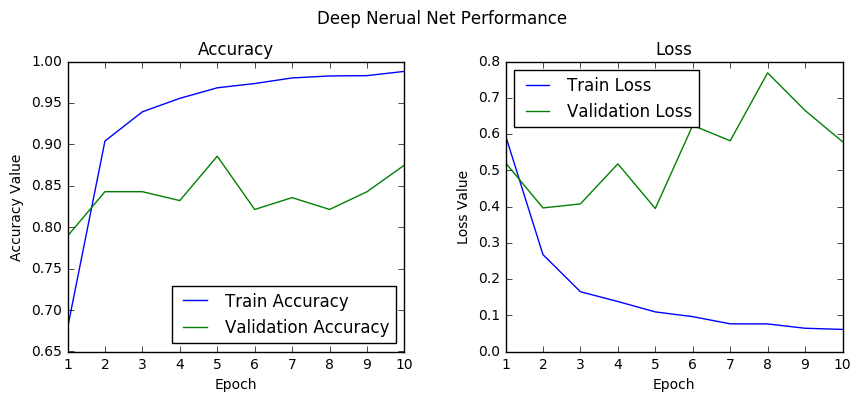

In [180]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Nerual Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1, 11))
ax1.plot(epochs, history.history['acc'], label = 'Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label = 'Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = 'best')

ax2.plot(epochs, history.history['loss'], label = 'Train Loss')
ax2.plot(epochs, history.history['val_loss'], label = 'Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc = 'best')

plt.show()

In [25]:
if __name__ == '__main__':
    list_text_withoutstop=[]
    location, polarity = choose_file()
    for x in range(2000):
        list_text_withoutstop.append(read_withoutstopwords(x))

Which one?
Dangdang_Book_4000
neg/pos?
neg


In [26]:
if __name__ == '__main__':
    location, polarity = choose_file()
    for x in range(2000):
        list_text_withoutstop.append(read_withoutstopwords(x))

Which one?
Dangdang_Book_4000
neg/pos?
pos


In [27]:
list_text_withoutstop = [i.strip() for i in list_text_withoutstop]

In [29]:
data2 = sklearn_tfidf()

D:\AnacondaPython\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [158]:
data2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [159]:
len(data2)

4000

In [30]:
len(data2[0])

20005

In [31]:
neg_data = data2[:2000]
pos_data = data2[2000:]
train_data =  np.vstack((neg_data[:1400], pos_data[:1400]))
test_data = np.vstack((neg_data[1400:], pos_data[1400:]))
train_labels = [0]*1400 + [1]*1400
test_labels = [0]*600 + [1]*600

In [162]:
from sklearn import svm 

clf = svm.SVC(kernel = 'linear') #SVM模块，svc,线性核函数 
clf.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [163]:
from sklearn.metrics import accuracy_score

predict_test = clf.predict(test_data)
accuracy_score(test_labels, predict_test)

0.9416666666666667

In [164]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[571,  29],
       [ 41, 559]])

In [165]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.93      0.95      0.94       600
          0       0.95      0.93      0.94       600

avg / total       0.94      0.94      0.94      1200



In [166]:
from sklearn import metrics

In [167]:
metrics.precision_score(test_labels, predict_test)

0.9506802721088435

In [168]:
metrics.recall_score(test_labels, predict_test)

0.9316666666666666

In [169]:
metrics.f1_score(test_labels, predict_test) 

0.9410774410774411

In [52]:
if __name__ == '__main__':
    list_text_withoutstop=[]
    location, polarity = choose_file()
    for x in range(2000):
        list_text_withoutstop.append(read_withoutstopwords(x))

Which one?
Jingdong_NB_4000
neg/pos?
neg


In [53]:
if __name__ == '__main__':
    location, polarity = choose_file()
    for x in range(2000):
        list_text_withoutstop.append(read_withoutstopwords(x))

Which one?
Jingdong_NB_4000
neg/pos?
pos


In [54]:
list_text_withoutstop = [i.strip() for i in list_text_withoutstop]

In [56]:
data3 = sklearn_tfidf()

D:\AnacondaPython\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [57]:
len(data3)

4000

In [58]:
len(data3[0])

7851

In [59]:
neg_data = data3[:2000]
pos_data = data3[2000:]
train_data =  np.vstack((neg_data[:1400], pos_data[:1400]))
test_data = np.vstack((neg_data[1400:], pos_data[1400:]))
train_labels = [0]*1400 + [1]*1400
test_labels = [0]*600 + [1]*600